<a href="https://colab.research.google.com/github/srv96/AI-ML-TensorFlow/blob/tensorflow_basic/Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import tensorflow as tf

In [19]:
from sklearn.datasets import load_breast_cancer

In [20]:
data = load_breast_cancer()

In [21]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(data.data,data.target,test_size=0.33,random_state=101)

In [24]:
N,D = X_train.shape

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (D, )),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

In [28]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
    )

In [29]:
r = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.2490 - loss: 1.2462 - val_accuracy: 0.3404 - val_loss: 1.0229
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2828 - loss: 1.1356 - val_accuracy: 0.4043 - val_loss: 0.9425
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3345 - loss: 1.0641 - val_accuracy: 0.4734 - val_loss: 0.8702
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4265 - loss: 0.8616 - val_accuracy: 0.5319 - val_loss: 0.8066
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5096 - loss: 0.8337 - val_accuracy: 0.5904 - val_loss: 0.7498
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5818 - loss: 0.7691 - val_accuracy: 0.6277 - val_loss: 0.7003
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6155 - loss: 0.7615 - val_accuracy: 0.6543 - val_loss: 0.6572
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6821 - loss: 0.6307 - val_accuracy: 0.7074 - 

In [30]:
print("train score : " , model.evaluate(X_train,y_train))
print("test score : " , model.evaluate(X_test,y_test))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9684 - loss: 0.1101 
train score :  [0.09704816341400146, 0.9763779640197754]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9721 - loss: 0.1283 
test score :  [0.16171695291996002, 0.957446813583374]


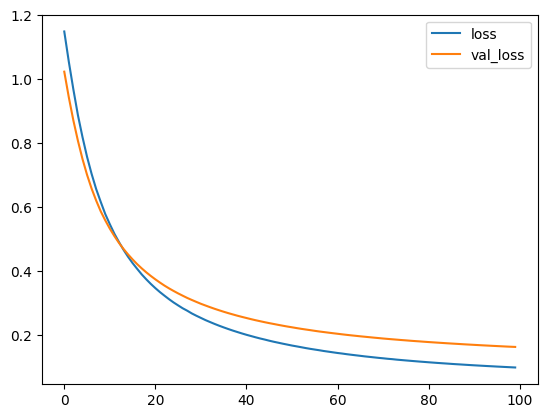

In [31]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

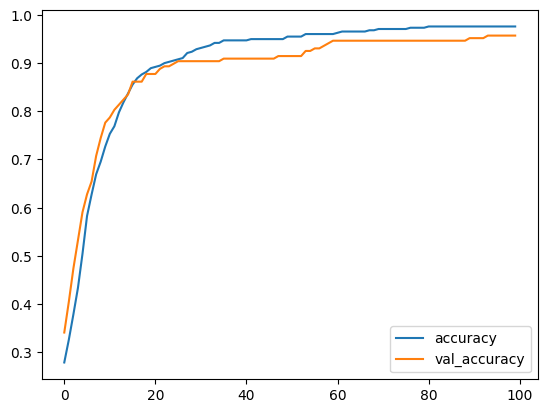

In [32]:
plt.plot(r.history['accuracy'],label = 'accuracy')
plt.plot(r.history['val_accuracy'],label = 'val_accuracy')
plt.legend()

P = model.predict(X_test)
print(P)

In [33]:
P = model.predict(X_test)
print(P)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
[[9.63779390e-01]
 [9.35843945e-01]
 [9.69537735e-01]
 [1.23278625e-01]
 [9.97833490e-01]
 [9.77820277e-01]
 [9.86971378e-01]
 [7.89197147e-05]
 [9.25542235e-01]
 [9.70041215e-01]
 [2.44978648e-02]
 [9.72752571e-01]
 [8.02177966e-01]
 [9.88605857e-01]
 [3.32202688e-02]
 [9.82970834e-01]
 [9.88375008e-01]
 [9.73641455e-01]
 [1.55170143e-04]
 [6.69810951e-01]
 [9.26566541e-01]
 [9.94770408e-01]
 [9.41455185e-01]
 [9.72323060e-01]
 [2.24550292e-02]
 [9.27114546e-01]
 [2.57516876e-02]
 [9.99111891e-01]
 [7.32151512e-03]
 [3.68576348e-02]
 [5.60672104e-01]
 [4.45032343e-02]
 [8.48832965e-01]
 [3.50520641e-01]
 [9.97170806e-01]
 [9.95784044e-01]
 [1.12096161e-01]
 [3.38012844e-01]
 [5.37248375e-03]
 [2.37491899e-04]
 [7.61327446e-02]
 [9.76874471e-01]
 [9.87839162e-01]
 [8.51761758e-01]
 [9.97788191e-01]
 [9.69933152e-01]
 [1.93435652e-03]
 [6.76052809e-01]
 [3.17552388e-01]
 [9.93137002e-01]
 [2.04249434e-02]
 [8.25252652e-01]
 [9.33922827e-01]
 [1.1864

In [35]:
import numpy as np
P = np.round(P).flatten()
print(P)

[1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1.
 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1.]


In [37]:
print("manually calculated accuracy : ", np.mean(P==y_test))
print("evaluate output : ", model.evaluate(X_test,y_test))

manually calculated accuracy :  0.9574468085106383
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9721 - loss: 0.1283 
evaluate output :  [0.16171695291996002, 0.957446813583374]
